In [4]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

import numpy as np
import matplotlib.pyplot as plt
import pandas

## Plot defaults ##
plt.rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = [
r'\usepackage{siunitx}', 
r'\sisetup{detect-all}', 
r'\usepackage{cmbright}',
r'\renewcommand{\familydefault}{\sfdefault}'
]
plt.rcParams.update({ 'xtick.major.width': 1.1, 'ytick.major.width': 1.1,
'axes.labelsize': 13, 'axes.linewidth': 1.2, 'axes.labelpad': 11,
'xtick.labelsize': 11, 'ytick.labelsize': 11, 'figure.figsize': [7.2, 3.0],
'font.size': 11, 'xtick.major.size': 4, 'ytick.major.size': 4 ,'legend.fontsize': 11})
plt.rcParams['xtick.minor.visible'], plt.rcParams['xtick.top'] = True,True
plt.rcParams['ytick.minor.visible'], plt.rcParams['ytick.right'] = True,True
plt.rcParams['xtick.direction'], plt.rcParams['ytick.direction'] = 'in','in'

In [5]:
data = pandas.read_csv('pokemon.csv')

In [6]:
trimmed = data[['base_total', 'capture_rate', 'is_legendary']]
trimmed = trimmed.drop(773) # sorry Minior...

In [7]:
# Visualise data
#plt.scatter(trimmed.base_total.astype('int'), trimmed.capture_rate.astype('int'), alpha = 0.6,c=list(map(lambda c: 0.3 * c + 0.5, trimmed.is_legendary)))

In [8]:
# Choose labels, training data
trimmed.capture_rate = trimmed.capture_rate.apply(lambda x: int(x))
X = trimmed.drop(columns= 'is_legendary').values
y = trimmed.is_legendary.values

In [9]:
from mpl_toolkits.axes_grid1 import ImageGrid

# Create kernels and classifiers
kernel = 1.0 * RBF([1.0])
gpc_rbf_isotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)
kernel = 1.0 * RBF([1.0, 1.0])
gpc_rbf_anisotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)

h = 1  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min-10, x_max+10, h),
                     np.arange(y_min-10, y_max+10, h))

titles = ["Isotropic RBF", "Anisotropic RBF"]

Z = [None]*2

for i, clf in enumerate((gpc_rbf_isotropic, gpc_rbf_anisotropic)):
    # Plot the predicted probabilities. For that, we will assign a color to
    # each point in the mesh [x_min, m_max]x[y_min, y_max].

    z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    
    z = np.array([[a[0],a[1],1] for a in z])

    # Put the result into a color plot-friendly format
    Z[i] = z.reshape((xx.shape[0], xx.shape[1], 3))

/home/albireo/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


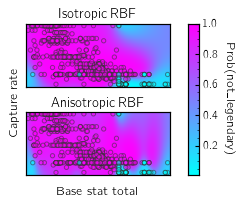

In [10]:
# Set up figure and image grid
fig = plt.figure(figsize=(9.75, 3))

grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(2,1),
                 axes_pad=0.35,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="4%",
                 cbar_pad=0.25,
                 )

y_c = np.c_[y,np.ones(y.size)]

for i, ax in enumerate(grid):
    im = ax.imshow(Z[i], extent=(xx.min(), xx.max(), yy.min(), yy.max()), origin="lower",cmap='cool')

    
    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=np.array([(1,0,1), "cyan"])[y],
               edgecolors=(0.2, 0.2, 0.2),s=18,alpha=0.55)
  
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_xlabel('Base stat total')
    #ax.set_ylabel('Catch rate')
    ax.set_title("%s" %
              (titles[i]))#, clf.log_marginal_likelihood(clf.kernel_.theta)))
# Colorbar
cbar = ax.cax.colorbar(im)
cbar.ax.get_yaxis().labelpad = 18
cbar.ax.set_ylabel('Prob(not\_\,legendary)',rotation='270')
ax.cax.toggle_label(True)
#fig.text(0.5, 0.04, 'Base stat total', ha='center', va='center')
fig.text(0.35,0.5, 'Capture rate', va='center', rotation='vertical',size=13)
plt.savefig('is_legendary.pdf',bbox_inches='tight')
plt.tight_layout()
plt.show()